# QUESTION 7

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
#import(random)
import random
import pandas as pd

In [11]:
# creating image folders
import matplotlib.pyplot as plt
import os
def create_image_folder(dataframe, method):
  # method -> train, val , test

  train_df = pd.read_csv(dataframe, header = None)
  label = train_df[1568]
  train_df = train_df.iloc[:,:-1]
  train_numpy = train_df.to_numpy()
  # 20000, 1568
  directory = method + '_folder/'
  for i, images in enumerate(train_numpy):
    image = train_numpy[i].reshape(28, 56)
    
    if not os.path.isdir(directory + str(label[i])):
      os.mkdir(directory + str(label[i]))

    path = directory + str(label[i]) + '/' + str(i) + '.png'
    
    
    plt.imsave(path, image)
  


In [10]:
!mkdir train_folder
!mkdir test_folder 
!mkdir val_folder

mkdir: cannot create directory ‘train_folder’: File exists
mkdir: cannot create directory ‘test_folder’: File exists
mkdir: cannot create directory ‘val_folder’: File exists


In [13]:
create_image_folder('train.txt', 'train')
create_image_folder('val.txt', 'val')
create_image_folder('test.txt', 'test')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# NORMALIZING 

In [14]:
#Normalizing and forming train loader and test loader
# Dataloader
from torch.utils.data import DataLoader
# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms
mean = 0.485
std = 0.229
train_data = datasets.ImageFolder('./train_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor(), transforms.Normalize(mean, std)]))
train_dataloader_image = DataLoader(train_data, batch_size = 128,shuffle=True)

# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms

test_data = datasets.ImageFolder('./test_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor(), transforms.Normalize(mean, std)]))

test_dataloader_image = DataLoader(test_data, batch_size = 128,shuffle=True)

# Display image and label.
# Define transformations for training and test sets-

from torchvision import transforms

val_data = datasets.ImageFolder('./val_folder', transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                     transforms.ToTensor(), transforms.Normalize(mean, std)]))
val_dataloader_image = DataLoader(val_data, batch_size = 128,shuffle=True)




# QUESTION 7 MODEL 2-

# Part a and b

In [15]:
from torch.nn import Module, Conv2d, ReLU, MaxPool2d, Sequential, Linear, BatchNorm2d


## Random Seed 1

Epoch 1 		 Training Loss: 2.547682425019088 		 Validation Loss: 2.359632748365402

Model train MisAccuracy = 0.8579

Model Test MisAccuracy = 0.8284
Epoch 2 		 Training Loss: 2.328659678720365 		 Validation Loss: 2.054592090845108

Model train MisAccuracy = 0.77625

Model Test MisAccuracy = 0.7134
Epoch 3 		 Training Loss: 1.2345859374210333 		 Validation Loss: 0.8702473096549511

Model train MisAccuracy = 0.401

Model Test MisAccuracy = 0.269
Epoch 4 		 Training Loss: 0.5660479216818597 		 Validation Loss: 0.6842151150107384

Model train MisAccuracy = 0.17525000000000002

Model Test MisAccuracy = 0.19099999999999995
Epoch 5 		 Training Loss: 0.3360759085340864 		 Validation Loss: 0.4563694018870592

Model train MisAccuracy = 0.10365000000000002

Model Test MisAccuracy = 0.12539999999999996
Epoch 6 		 Training Loss: 0.23248567930452382 		 Validation Loss: 0.3381444623693824

Model train MisAccuracy = 0.07245000000000001

Model Test MisAccuracy = 0.08679999999999999
Epoch 7 		 Training 

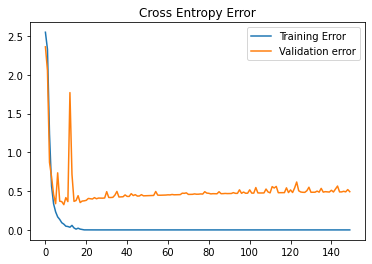

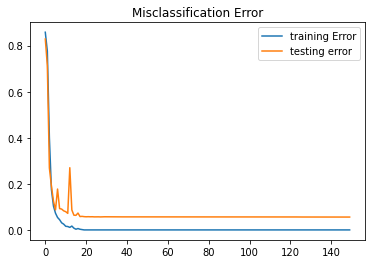

Final_test_accuracy is 0.05579999999999996


In [16]:

random.seed(1)
class LeNet5(Module):
    def __init__(self, num_classes=19):
        super(LeNet5, self).__init__()
        self.layer1 = Sequential(
            Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(6),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = Sequential(
            Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = Linear(704, 120)
        self.relu = ReLU()
        self.fc1 = Linear(120, 84)
        self.relu1 = ReLU()
        self.fc2 = Linear(84, num_classes)
        self.drop=nn.Dropout(0.1)
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print("layer2",out.shape)
        out = out.reshape(out.size(0), -1)
        # print("reshape",out.shape)
        out=self.drop(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model2_actual_part1_rs=1')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot(misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


# RANDOM SEED 66

Epoch 1 		 Training Loss: 2.6315912501827166 		 Validation Loss: 2.357459968328476

Model train MisAccuracy = 0.8779

Model Test MisAccuracy = 0.8246
Epoch 2 		 Training Loss: 2.3520304450563563 		 Validation Loss: 2.086040711402893

Model train MisAccuracy = 0.7914

Model Test MisAccuracy = 0.7086
Epoch 3 		 Training Loss: 1.3279446576051652 		 Validation Loss: 1.1655354097485542

Model train MisAccuracy = 0.4394

Model Test MisAccuracy = 0.34140000000000004
Epoch 4 		 Training Loss: 0.5694964237653526 		 Validation Loss: 0.6718983516097069

Model train MisAccuracy = 0.17625000000000002

Model Test MisAccuracy = 0.17759999999999998
Epoch 5 		 Training Loss: 0.3254515648267831 		 Validation Loss: 0.4494730159640312

Model train MisAccuracy = 0.10035000000000005

Model Test MisAccuracy = 0.11099999999999999
Epoch 6 		 Training Loss: 0.22472474861676525 		 Validation Loss: 0.5416953437030315

Model train MisAccuracy = 0.06889999999999996

Model Test MisAccuracy = 0.1372
Epoch 7 		 Traini

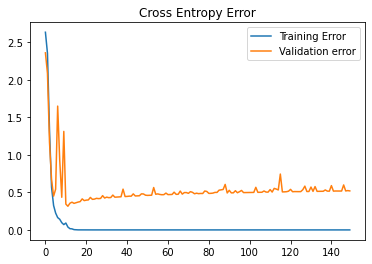

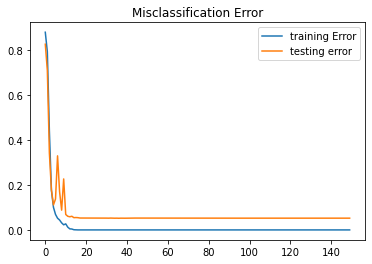

Final_test_accuracy is 0.052200000000000024


In [17]:

random.seed(66)
class LeNet5(Module):
    def __init__(self, num_classes=19):
        super(LeNet5, self).__init__()
        self.layer1 = Sequential(
            Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(6),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = Sequential(
            Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = Linear(704, 120)
        self.relu = ReLU()
        self.fc1 = Linear(120, 84)
        self.relu1 = ReLU()
        self.fc2 = Linear(84, num_classes)
        self.drop=nn.Dropout(0.1)
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print("layer2",out.shape)
        out = out.reshape(out.size(0), -1)
        # print("reshape",out.shape)
        out=self.drop(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model2_actual_part1_rs=66')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot(misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


# Seed 88

Epoch 1 		 Training Loss: 2.5637834406202766 		 Validation Loss: 2.8792462587356566

Model train MisAccuracy = 0.86485

Model Test MisAccuracy = 0.9296
Epoch 2 		 Training Loss: 2.6263177197450287 		 Validation Loss: 2.3338805556297304

Model train MisAccuracy = 0.8511

Model Test MisAccuracy = 0.8044
Epoch 3 		 Training Loss: 1.8421738352745203 		 Validation Loss: 1.5481960743665695

Model train MisAccuracy = 0.6274500000000001

Model Test MisAccuracy = 0.5016
Epoch 4 		 Training Loss: 0.8915172450861354 		 Validation Loss: 1.1903733298182488

Model train MisAccuracy = 0.27995000000000003

Model Test MisAccuracy = 0.3446
Epoch 5 		 Training Loss: 0.45683122421525846 		 Validation Loss: 0.6499638527631759

Model train MisAccuracy = 0.14195000000000002

Model Test MisAccuracy = 0.1824
Epoch 6 		 Training Loss: 0.30525519077185614 		 Validation Loss: 1.027145154774189

Model train MisAccuracy = 0.09275

Model Test MisAccuracy = 0.22640000000000005
Epoch 7 		 Training Loss: 0.232680737592

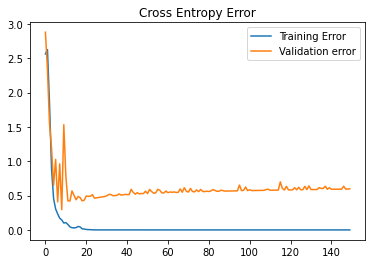

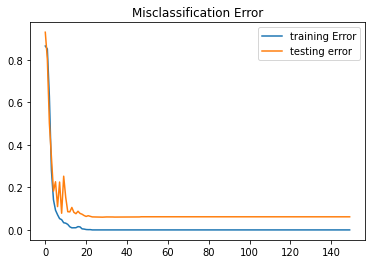

Final_test_accuracy is 0.06159999999999999


In [18]:

random.seed(88)  #change
class LeNet5(Module):
    def __init__(self, num_classes=19):
        super(LeNet5, self).__init__()
        self.layer1 = Sequential(
            Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(6),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = Sequential(
            Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = Linear(704, 120)
        self.relu = ReLU()
        self.fc1 = Linear(120, 84)
        self.relu1 = ReLU()
        self.fc2 = Linear(84, num_classes)
        self.drop=nn.Dropout(0.1)
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print("layer2",out.shape)
        out = out.reshape(out.size(0), -1)
        # print("reshape",out.shape)
        out=self.drop(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

            #torch.max(test_output, 1)[1].data.squeeze()
            #accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    #if min_valid_loss > valid_loss:
        #print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        #min_valid_loss = valid_loss
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model2_actual_part1_rs=88')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot(misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


# Random seed 100

Epoch 1 		 Training Loss: 2.5723026801066795 		 Validation Loss: 2.427025371789932

Model train MisAccuracy = 0.8667

Model Test MisAccuracy = 0.8584
Epoch 2 		 Training Loss: 2.2907392591427844 		 Validation Loss: 2.2277794629335403

Model train MisAccuracy = 0.7683

Model Test MisAccuracy = 0.7152000000000001
Epoch 3 		 Training Loss: 1.1974843964455233 		 Validation Loss: 1.2509441018104552

Model train MisAccuracy = 0.3873

Model Test MisAccuracy = 0.36119999999999997
Epoch 4 		 Training Loss: 0.5499145458837983 		 Validation Loss: 0.6599787905812263

Model train MisAccuracy = 0.1673

Model Test MisAccuracy = 0.17900000000000005
Epoch 5 		 Training Loss: 0.3333179064237388 		 Validation Loss: 0.6366294041275978

Model train MisAccuracy = 0.10065000000000002

Model Test MisAccuracy = 0.15180000000000005
Epoch 6 		 Training Loss: 0.23996474228467152 		 Validation Loss: 0.4425180356949568

Model train MisAccuracy = 0.07589999999999997

Model Test MisAccuracy = 0.11040000000000005
Epoc

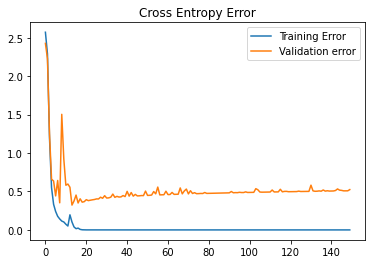

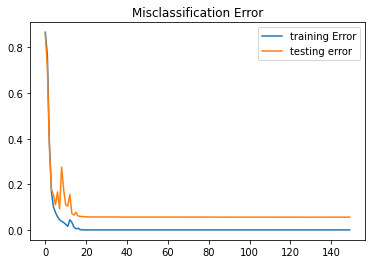

Final_test_accuracy is 0.05600000000000005


In [19]:

random.seed(100)  #change
class LeNet5(Module):
    def __init__(self, num_classes=19):
        super(LeNet5, self).__init__()
        self.layer1 = Sequential(
            Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(6),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = Sequential(
            Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = Linear(704, 120)
        self.relu = ReLU()
        self.fc1 = Linear(120, 84)
        self.relu1 = ReLU()
        self.fc2 = Linear(84, num_classes)
        self.drop=nn.Dropout(0.1)
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print("layer2",out.shape)
        out = out.reshape(out.size(0), -1)
        # print("reshape",out.shape)
        out=self.drop(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        #(float((pred_y == target_y).astype(int).sum()) / float(target_y.size))
        #correct=correct+ (float((target == labels).astype(int).sum()))
        
        #correct =correct+ (target == labels).float().sum()

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model2_actual_part1_rs=100')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot(misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


# RANDOM SEED 200

Epoch 1 		 Training Loss: 2.5552027696257182 		 Validation Loss: 2.5517022788524626

Model train MisAccuracy = 0.8625

Model Test MisAccuracy = 0.8464
Epoch 2 		 Training Loss: 2.2018637953290514 		 Validation Loss: 2.074957063794136

Model train MisAccuracy = 0.7489

Model Test MisAccuracy = 0.6674
Epoch 3 		 Training Loss: 1.110699785173319 		 Validation Loss: 1.2825229451060296

Model train MisAccuracy = 0.35209999999999997

Model Test MisAccuracy = 0.3852
Epoch 4 		 Training Loss: 0.4734719649052164 		 Validation Loss: 0.6643016550689935

Model train MisAccuracy = 0.14290000000000003

Model Test MisAccuracy = 0.2096
Epoch 5 		 Training Loss: 0.2856454068593159 		 Validation Loss: 0.8561504349112511

Model train MisAccuracy = 0.08855000000000002

Model Test MisAccuracy = 0.2288
Epoch 6 		 Training Loss: 0.19976617934502613 		 Validation Loss: 0.29490285031497476

Model train MisAccuracy = 0.06164999999999998

Model Test MisAccuracy = 0.08220000000000005
Epoch 7 		 Training Loss: 0.1

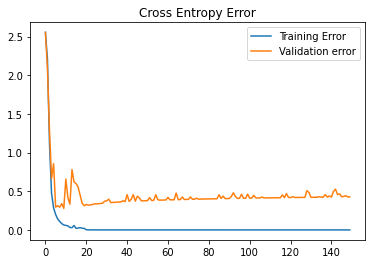

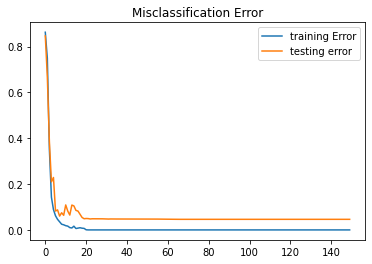

Final_test_accuracy is 0.04620000000000002


In [20]:

random.seed(200)  #change
class LeNet5(Module):
    def __init__(self, num_classes=19):
        super(LeNet5, self).__init__()
        self.layer1 = Sequential(
            Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(6),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = Sequential(
            Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            BatchNorm2d(16),
            ReLU(),
            MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = Linear(704, 120)
        self.relu = ReLU()
        self.fc1 = Linear(120, 84)
        self.relu1 = ReLU()
        self.fc2 = Linear(84, num_classes)
        self.drop=nn.Dropout(0.1)
        
    def forward(self, x):
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print("layer2",out.shape)
        out = out.reshape(out.size(0), -1)
        # print("reshape",out.shape)
        out=self.drop(out)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

model = LeNet5()
# if torch.cuda.is_available():
    # model = model.cuda()
# Declaring Criterion and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
 
# Training with Validation
epochs = 150
min_valid_loss = np.inf
train_loss_li=[]
val_loss_li=[]
misclass_train_li=[]
misclass_test_li=[]  #changed
 
for e in range(epochs):

    train_loss = 0.0
    # print(e,"epoch",model.Conv2D.weights)
    total4=0
    correct=0
    accuracy=0
    for data, labels in train_dataloader_image:
        # Transfer Data to GPU if available
        total=0
        # if torch.cuda.is_available():
        #    data, labels = data.cuda(), labels.cuda()
         
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        #print("ouput",target)

        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
        
        # Calculating accuracy 
        _, predicted4 = torch.max(target, 1)
        #print("predicted",predicted4)
        #print("label",labels)
        total4 += labels.shape[0]
        correct += (predicted4 == labels).sum().item()

        

    mis_accuracy=1-(correct /total4)
                       
                       #float(len(target)))
    train_loss_li.append(train_loss / len(train_dataloader_image))
    misclass_train_li.append(mis_accuracy)
       

   
    # Validation error
    #CROSS ENTROPY
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in val_dataloader_image:
        # Transfer Data to GPU if available
        #if torch.cuda.is_available():
            # data, labels = data.cuda(), labels.cuda()
         
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate Loss
        valid_loss += loss.item()
    val_loss_li.append(valid_loss / len(val_dataloader_image))

    # Misaccuracy

    #with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader_image:
            #print(labels)
            #images, labels = images.cuda(), labels.cuda()
            test_output = model(images)
            #plt.imshow(images)
            
            _,pred_y = torch.max(test_output.data, 1)
            #print("pred_y",pred_y)
            total+=labels.size(0) #shape[0]       #labels.size(0)
            correct += (pred_y ==labels).sum().item()
            #print(pred_y,labels)
    accuracy = (correct/total )      
    

    test_misclassify=1- accuracy
    #correct_count/all_count
    misclass_test_li.append(test_misclassify)




    if (e+1) % 1 == 0:
      print(f'Epoch {e+1} \t\t Training Loss: { train_loss / len(train_dataloader_image)} \t\t Validation Loss: {valid_loss / len(val_dataloader_image)}')
      print("\nModel train MisAccuracy =", mis_accuracy)
      print("\nModel Test MisAccuracy =", test_misclassify)

    
         
        # Saving State Dict
    torch.save(model.state_dict(), '/content/drive/MyDrive/saved_model2_actual_part1_rs=200')

# Cross validation Plot
import matplotlib.pyplot as plt
plt.plot(train_loss_li,label="Training Error")
plt.plot(val_loss_li,label="Validation error")
plt.title("Cross Entropy Error")
plt.legend()
plt.show()

#Misaccuracy Plot
import matplotlib.pyplot as plt
plt.plot(misclass_train_li,label="training Error")
plt.plot(misclass_test_li,label="testing error")
plt.title("Misclassification Error")
plt.legend()
plt.show()
print("Final_test_accuracy is",test_misclassify)


Random seed 66 has the least misclassification error

# PART C

In [21]:
model_new_cnn3 = LeNet5()
#saved_model_cnn_bef_full=0.1_rs_88
#'/content/drive/MyDrive/saved_model_actual_part1_rs=100'
#model_new_cnn2.load_state_dict(torch.load('/content/drive/MyDrive/saved_model_cnn_full=0.1_rs_88.pth'))
model_new_cnn3.load_state_dict(torch.load('/content/drive/MyDrive/saved_model2_lr=0.1_actual_part1_rs=1'))




<All keys matched successfully>

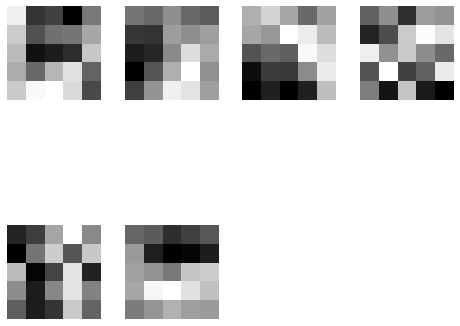

In [25]:
import matplotlib.pyplot as plt

params = list(model_new_cnn3.parameters())[0]
plt.figure(figsize=(8, 8))
for i in range(params.shape[0]):
    plt.subplot(2,4,i + 1) # Since we know it is a 10 x 10 grid
    x = params[i,:].detach().numpy()
    plt.imshow(x.reshape((5, 5)), cmap = "gray", interpolation = "nearest")
    plt.axis("off")
plt.subplots_adjust(wspace=0.25, hspace=0.01)